In [9]:
# read data, compulsory
import json

import torch

# variables
ckpt_path = '../../../ai4ps_logs/checkpoints/soqy_0_checkpoint.pt'

data = torch.load(ckpt_path)
print(type(data))
print(data.keys())

predictions = list(data['targets']['predictions'].reshape(-1).numpy())
targets = data['targets']['targets']

<class 'dict'>
dict_keys(['state_dict', 'loss', 'val_loss_list', 'targets'])


In [17]:
# read ensemble data, optional
import json
import torch


# variables
ckpt_path = '../../../ai4ps_logs/checkpoints/soqy_0_checkpoint.pt'
data = torch.load(ckpt_path)

predictions = [list(data['targets']['predictions'].reshape(-1).numpy())]
targets = [list(data['targets']['targets'].numpy())]

for i in range(1,4):
    ckpt_path = f'../../../ai4ps_logs/checkpoints/soqy_{i}_checkpoint.pt'
    data = torch.load(ckpt_path)
    predictions.append(list(data['targets']['predictions'].reshape(-1).numpy()))
    targets.append(data['targets']['targets'])

predictions = torch.tensor(predictions)
targets = torch.tensor(targets)
# predictions = predictions.mean(dim=0)
# targets = targets.mean(dim=0)

-0.15535807609558105


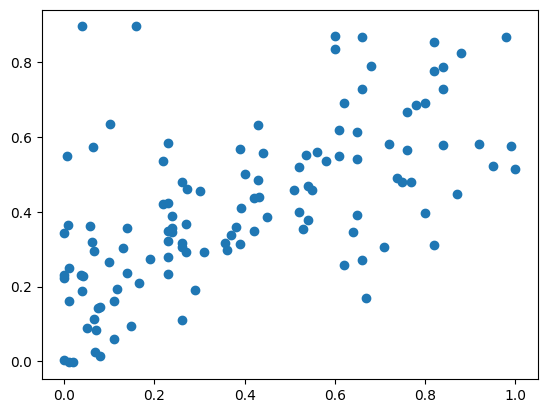

In [10]:
from matplotlib import pyplot as plt
import numpy as np

np_pred = np.array(predictions)
np_targ = np.array(targets)
r2 = 1 - np.mean((np_pred - np_targ)**2)/np.var(np_pred)
print(r2)
plt.scatter(targets, predictions)
plt.show()

In [11]:
print(np.mean((np_pred - np_targ)**2), np.var(np_pred))

0.05392258 0.046671744


In [5]:
np_pred

array([ 0.7296256 ,  0.8346311 ,  0.05965685,  0.7757499 ,  0.35019055,
        0.08978329,  0.618665  ,  0.3104417 ,  0.02520829,  0.3049349 ,
        0.3139144 ,  0.7869925 ,  0.2991189 ,  0.86895376,  0.31669393,
        0.36069763,  0.86875594,  0.16136853,  0.4607754 ,  0.3388025 ,
        0.57574975,  0.5746906 ,  0.5350928 ,  0.5361677 ,  0.3919696 ,
        0.23182411,  0.4247127 ,  0.569601  , -0.00294587,  0.44116265,
        0.8552004 ,  0.436874  ,  0.56698084,  0.5498097 ,  0.44839025,
        0.23528694,  0.368577  ,  0.63375795,  0.4787859 ,  0.5202339 ,
        0.4787859 ,  0.5784658 ,  0.49191853,  0.35739815,  0.36366957,
        0.11456791,  0.273168  ,  0.46940503,  0.5404454 ,  0.23405729,
        0.667649  ,  0.5018707 ,  0.3183641 ,  0.16275348, -0.00248172,
        0.29360273,  0.52313066,  0.3069719 ,  0.5601702 ,  0.3495661 ,
        0.14458679,  0.7290528 ,  0.01450529,  0.30304965,  0.3882646 ,
        0.5488787 ,  0.25060353,  0.17042099,  0.55126673,  0.39

-0.2837843894958496


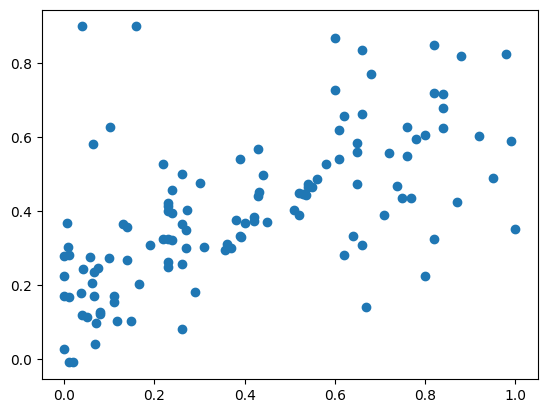

In [7]:
from matplotlib import pyplot as plt
import numpy as np

np_pred = np.array(predictions)
np_targ = np.array(targets)
r2 = 1 - np.mean((np_pred - np_targ)**2)/np.var(np_pred)
print(r2)
plt.scatter(targets, predictions)
plt.show()

In [18]:
print(torch.tensor(predictions).std(axis=0))

tensor([0.0486, 0.0828, 0.0793, 0.0636, 0.0589, 0.0388, 0.0100, 0.0733, 0.0136,
        0.0790, 0.0569, 0.0660, 0.0337, 0.1721, 0.1015, 0.0230, 0.0311, 0.0625,
        0.0933, 0.0341, 0.0845, 0.0180, 0.0180, 0.0695, 0.1240, 0.0469, 0.0759,
        0.0527, 0.0067, 0.0750, 0.0057, 0.0487, 0.0473, 0.1441, 0.2671, 0.0602,
        0.0514, 0.0532, 0.1428, 0.0913, 0.1428, 0.0364, 0.0500, 0.1164, 0.1700,
        0.0930, 0.0251, 0.0399, 0.0703, 0.0447, 0.0568, 0.1016, 0.0937, 0.0322,
        0.0085, 0.0546, 0.0696, 0.0899, 0.0899, 0.0253, 0.0207, 0.0668, 0.0965,
        0.0611, 0.0651, 0.0537, 0.0529, 0.0501, 0.1149, 0.0435, 0.0179, 0.0546,
        0.1129, 0.0888, 0.0793, 0.1286, 0.0732, 0.0962, 0.0697, 0.0743, 0.0211,
        0.0744, 0.0283, 0.0829, 0.0600, 0.0529, 0.0870, 0.1393, 0.0085, 0.0102,
        0.0769, 0.0236, 0.0745, 0.1616, 0.0856, 0.0273, 0.0531, 0.0644, 0.0582,
        0.0529, 0.0984, 0.0479, 0.0269, 0.1594, 0.0606, 0.0519, 0.0860, 0.0437,
        0.0490, 0.0313, 0.0166, 0.1577, 

/tmp/ipykernel_6625/4142817737.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(predictions).std(axis=0))
